In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/refs/heads/main/housing.csv')

In [45]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
if df['median_house_value'].isna().sum() > 0:
    df.dropna(subset='median_house_value')

In [5]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value'].copy()

In [6]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [7]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

In [11]:
len(X_train.columns), len(X_test.columns)

(9, 9)

In [14]:
num_features = X_train.select_dtypes(include=[np.number]).columns

In [15]:
categ_features = X_train.select_dtypes(include='object').columns
# X_train.select_dtypes(exclude=[np.number]).columns

In [23]:
#from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [24]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

categ_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('object', categ_pipeline, categ_features)
], remainder='passthrough')  

In [27]:
col_names = transformer.get_feature_names_out()
col_names

array(['num__longitude', 'num__latitude', 'num__housing_median_age',
       'num__total_rooms', 'num__total_bedrooms', 'num__population',
       'num__households', 'num__median_income',
       'object__ocean_proximity_<1H OCEAN',
       'object__ocean_proximity_INLAND', 'object__ocean_proximity_ISLAND',
       'object__ocean_proximity_NEAR BAY',
       'object__ocean_proximity_NEAR OCEAN'], dtype=object)

In [ ]:
#X_train_transformed = transformer.fit_transform(X_train)
#col_names = transformer.get_feature_names_out()
#X_train_transformed_df = pd.DataFrame(data=X_train_transformed, columns=col_names)

#or

#transformer.fit(X_train)
#then, make X_train_transformed being just transformer.transform()

In [28]:
X_train_transformed = pd.DataFrame(data = transformer.fit_transform(X_train), columns=col_names)

In [29]:
X_train_transformed

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,object__ocean_proximity_<1H OCEAN,object__ocean_proximity_INLAND,object__ocean_proximity_ISLAND,object__ocean_proximity_NEAR BAY,object__ocean_proximity_NEAR OCEAN
0,1.172993,-1.350415,0.428537,1.570557,1.376799,1.081011,1.507507,0.379698,0.0,0.0,0.0,0.0,1.0
1,1.268028,-1.378536,-1.473509,-0.809439,-0.900718,-0.643842,-0.878707,0.420068,0.0,0.0,0.0,0.0,1.0
2,-1.352939,0.988349,-0.046974,1.994289,2.441082,1.363196,2.593828,-0.092320,0.0,0.0,0.0,1.0,0.0
3,-1.127856,0.758691,-0.284730,0.646558,0.230833,0.661262,0.394820,0.682999,1.0,0.0,0.0,0.0,0.0
4,1.793222,-1.083261,-1.632013,-1.117906,-1.181804,-1.203802,-1.255755,-1.255560,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-1.402957,1.082087,1.617317,-0.777706,-0.742156,-0.731143,-0.804879,-1.335305,0.0,0.0,0.0,1.0,0.0
16508,0.592779,-0.816108,0.507789,-0.400173,-0.499510,-0.613860,-0.496385,1.421304,1.0,0.0,0.0,0.0,0.0
16509,0.117604,0.304062,-0.997998,-0.005374,-0.026228,-0.309630,0.052048,-0.911522,0.0,1.0,0.0,0.0,0.0
16510,1.187999,-0.727057,-0.522486,-0.078641,0.041040,0.122465,-0.016506,-0.634382,0.0,1.0,0.0,0.0,0.0


In [30]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15362,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,INLAND
16623,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,NEAR BAY
18086,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,INLAND
2144,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,<1H OCEAN


In [33]:
X_test_transformed = pd.DataFrame(transformer.transform(X_test), columns=col_names)

In [34]:
X_test_transformed

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,object__ocean_proximity_<1H OCEAN,object__ocean_proximity_INLAND,object__ocean_proximity_ISLAND,object__ocean_proximity_NEAR BAY,object__ocean_proximity_NEAR OCEAN
0,-1.407959,2.361612,-1.473509,-0.165440,-0.225631,-0.135910,-0.164161,-0.865909,0.0,1.0,0.0,0.0,0.0
1,0.597781,-0.844229,0.507789,-0.666640,-0.795010,-0.729379,-0.757419,0.454671,1.0,0.0,0.0,0.0,0.0
2,1.162989,-1.364476,0.824797,0.211626,-0.256863,-0.223211,-0.179981,1.955030,0.0,0.0,0.0,0.0,1.0
3,0.562768,-0.741118,-0.839494,1.000758,1.571397,0.403768,1.412586,0.316574,1.0,0.0,0.0,0.0,0.0
4,0.562768,-0.680188,0.349286,-0.237307,-0.297704,-0.328148,-0.288086,0.268129,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,-1.177874,2.291308,-1.235754,0.907891,0.824237,0.327049,0.616302,-0.820138,0.0,1.0,0.0,0.0,0.0
4124,-1.257904,0.960228,-0.205478,-0.013307,0.346151,-0.023918,0.281441,-0.632967,0.0,0.0,0.0,1.0,0.0
4125,0.282665,-0.113073,1.062553,0.094959,-0.052655,-0.198520,-0.034963,-0.048646,0.0,1.0,0.0,0.0,0.0
4126,0.822864,-0.937967,0.824797,-0.544373,-0.749364,-0.771707,-0.725778,2.089825,1.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rfr = RandomForestRegressor()

In [41]:
rfr.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [42]:
print(rfr.score(X_train_transformed, y_train))
print(rfr.score(X_test_transformed, y_test))

0.9749481523649282
0.8243489521689578


In [49]:
# Feature Engineering
df['bedroom_ratio'] = df['total_bedrooms'] / df['total_rooms']
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['population_per_household'] = df['population'] / df['households']

In [54]:
sleep_eff_df = pd.read_csv('Sleep_Efficiency.csv', encoding='latin1')

In [55]:
sleep_eff_df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [56]:
sleep_eff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [57]:
sleep_eff_df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [58]:
sleep_eff_df.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

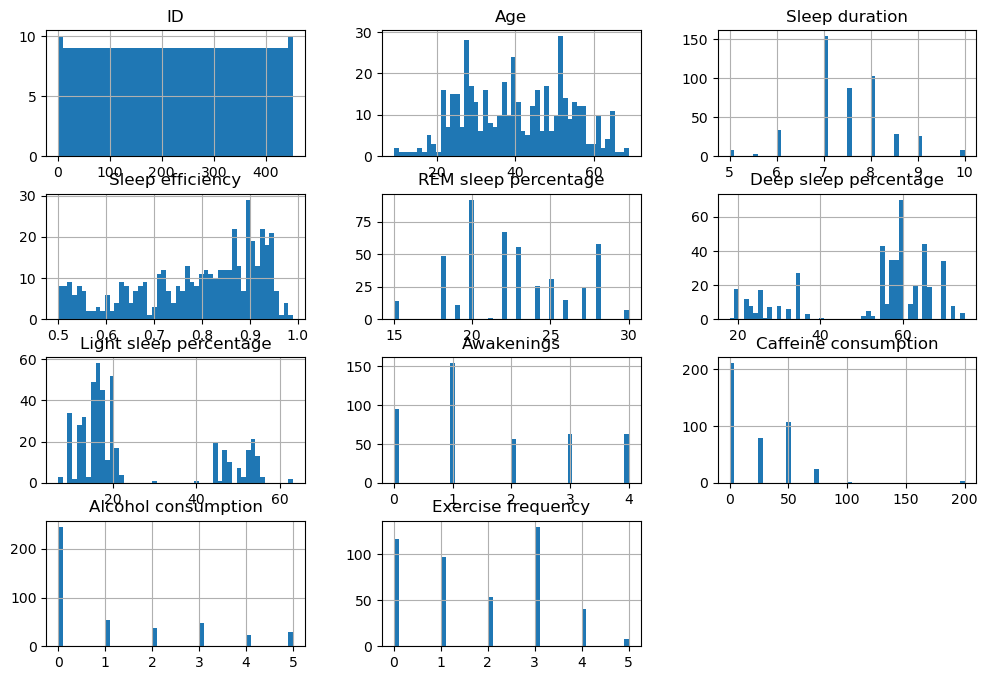

In [60]:
sleep_eff_df.hist(bins=50, figsize=(12, 8));

In [63]:
sleep_eff_df.drop('Gender', axis=1, inplace=True)

In [64]:
sleep_eff_df

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [67]:
sleep_eff_df.dropna(subset=['Awakenings', 'Alcohol consumption'], inplace=True)

In [69]:
sleep_eff_df.isna().sum()

ID                         0
Age                        0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                 0
Caffeine consumption      24
Alcohol consumption        0
Smoking status             0
Exercise frequency         6
dtype: int64

In [70]:
if sleep_eff_df['Sleep efficiency'].isna().sum() > 0:
    df.dropna(subset='Sleep efficiency')

In [71]:
X = sleep_eff_df.drop('Sleep efficiency', axis=1)
y = sleep_eff_df['Sleep efficiency'].copy()

In [72]:
sleep_imputer = SimpleImputer(strategy='median')

In [75]:
sleep_eff_df['Caffeine consumption'] = sleep_imputer.fit_transform(pd.DataFrame(sleep_eff_df['Caffeine consumption']))

In [76]:
sleep_eff_df.isna().sum()

ID                        0
Age                       0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        6
dtype: int64

In [90]:
# Feature Engineering
sleep_eff_df['Wakeup time'] = pd.to_datetime(sleep_eff_df['Wakeup time']).dt.hour
sleep_eff_df['Bedtime duration'] = pd.to_datetime(sleep_eff_df['Bedtime']).dt.hour

# sleep_eff_df['Wakeup - Bedtime duration'] = (sleep_eff_df['Wakeup time'] - sleep_eff_df['Bedtime'])
# sleep_eff_df['REM per deep sleep ratio'] = (sleep_eff_df['REM sleep percentage'] / sleep_eff_df['Deep sleep percentage'])
# sleep_eff_df['REM per light sleep ratio'] = (sleep_eff_df['REM sleep percentage'] / sleep_eff_df['Light sleep percentage'])

In [95]:
sleep_eff_df.dtype()

AttributeError: 'DataFrame' object has no attribute 'dtype'